In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#import datetime

# Data Preprocess

In [40]:
# read the data
weather = pd.read_csv("weatherAUS.csv", sep = ",")
# get copy of df with NA
weather_na = weather.copy()
# show the first 5 rows
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#month = np.zeros(len(weather["Date"]))
#for i in range(len(weather["Date"])):
#    datem = datetime.datetime.strptime(weather["Date"][i], "%Y-%m-%d")
#    month[i] = datem.month
#weather["Date"] = month.astype(object)
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [41]:
# replace the na values in numerical columns with their median
numeric = weather.select_dtypes(include = "float64").columns
scale = StandardScaler()
for col in numeric:
    weather[col].fillna(weather[col].median(), inplace = True)

weather_outliers = weather.copy()
    
for col in ["Rainfall", "Evaporation","WindSpeed9am", "WindSpeed3pm"]:
    IQR = weather[col].quantile(0.75) - weather[col].quantile(0.25)
    LQ = weather[col].quantile(0.25) - IQR*3
    UQ = weather[col].quantile(0.75) + IQR*3
    weather = weather[(weather[col] > LQ)]
    weather = weather[(weather[col] < UQ)]
    

# normalize the numeric columns
weather[numeric] = scale.fit_transform(weather[numeric])

    
# replace the na values in categorical columns with None as a new class   
categoric = weather.select_dtypes(include = "object").drop(["Date", "RainToday","RainTomorrow"], axis = 1).columns
for col in categoric:
    weather[col].fillna("None", inplace = True)

# get a copy of df without dummy     
weather_full = weather.copy()
    
    
# replace the categorical variables with dummy variable
for col in categoric:
    temp = pd.get_dummies(weather[col], prefix = col)
    weather = pd.merge(left = weather, right = temp, left_index = True, right_index = True)
    weather = weather.drop(col, axis = 1)

    
# remove na in raintoday and raintomorrow
weather = weather.dropna().copy()


# replace Raintoday and Raintomorrow with dummy variable (0 = No, 1 = Yes)
weather["RainToday"] = pd.get_dummies(weather["RainToday"], drop_first = True)
weather["RainTomorrow"] = pd.get_dummies(weather["RainTomorrow"], drop_first = True)




# drop the Date variable 
weather = weather.drop("Date", axis = 1)

# show the first 5 rows
weather.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.294803,-0.051552,0.988365,0.039317,0.089395,0.431532,0.798960,0.680733,0.187503,-1.468490,...,0,0,0,0,0,0,0,0,1,0
1,-0.663982,0.279887,-0.397284,0.039317,0.089395,0.431532,-1.093864,0.444117,-1.365370,-1.309347,...,0,0,0,0,0,0,0,0,0,1
2,0.214905,0.370280,-0.397284,0.039317,0.089395,0.592633,0.680658,0.917349,-1.710453,-1.044110,...,0,0,0,0,0,0,0,0,0,1
3,-0.376346,0.716786,-0.397284,0.039317,0.089395,-1.179478,-0.265754,-1.093884,-1.307856,-1.786775,...,0,0,0,0,0,0,0,0,0,0
4,0.949973,1.364600,1.912130,0.039317,0.089395,0.189880,-0.738960,0.207502,0.820155,-0.884967,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# split data into train and test with 1:1 ratio 
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(weather.drop("RainTomorrow", axis = 1),weather["RainTomorrow"],test_size=0.5,random_state = 0)

print(x_tr.shape)
print(y_tr.shape)
print(x_te.shape)
print(y_te.shape)

(51703, 117)
(51703,)
(51703, 117)
(51703,)


# Descriptive Analysis

In [5]:
def missing_values_table(df):
        
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([ mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = { 0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        
        #sort by missing % of total values
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_values_table(weather_na)

Your selected dataframe has 23 columns and 145460 Rows.
There are 21 columns that have missing values.


,Missing Values,% of Total Values,Data Type
Sunshine,69835,48.0,float64
Evaporation,62790,43.2,float64
Cloud3pm,59358,40.8,float64
Cloud9am,55888,38.4,float64
Pressure9am,15065,10.4,float64
Pressure3pm,15028,10.3,float64
WindDir9am,10566,7.3,object
WindGustDir,10326,7.1,object
WindGustSpeed,10263,7.1,float64
Humidity3pm,4507,3.1,float64


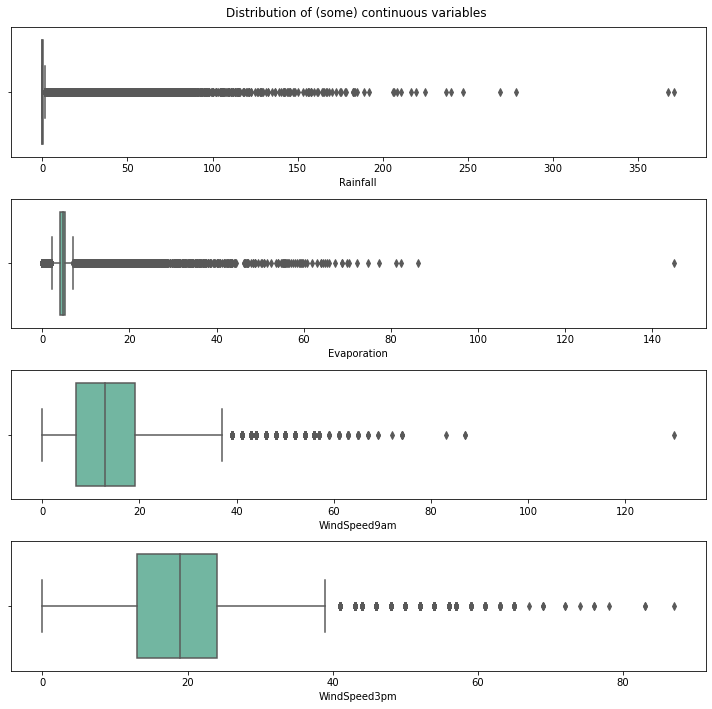

In [43]:
#boxplots to check outliers
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.boxplot(x= 'Rainfall', data = weather_outliers, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Evaporation
sns.boxplot(x= 'Evaporation', data = weather_outliers, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Windspeed (9AM)
sns.boxplot(x= 'WindSpeed9am', data = weather_outliers, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

# Windspeed (3PM)
sns.boxplot(x= 'WindSpeed3pm', data = weather_outliers, palette = 'Set2', ax = axes[3])
axes[3].set_title("")

plt.tight_layout()

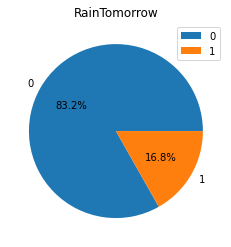

In [17]:
# pie chart of RainTomorrow
data = [(weather['RainTomorrow'] == 0).sum(), (weather['RainTomorrow'] != 0).sum()]
lab = [0,1]
plt.pie(data, labels = lab, autopct='%1.1f%%')
plt.title('RainTomorrow')
plt.legend()
plt.show()

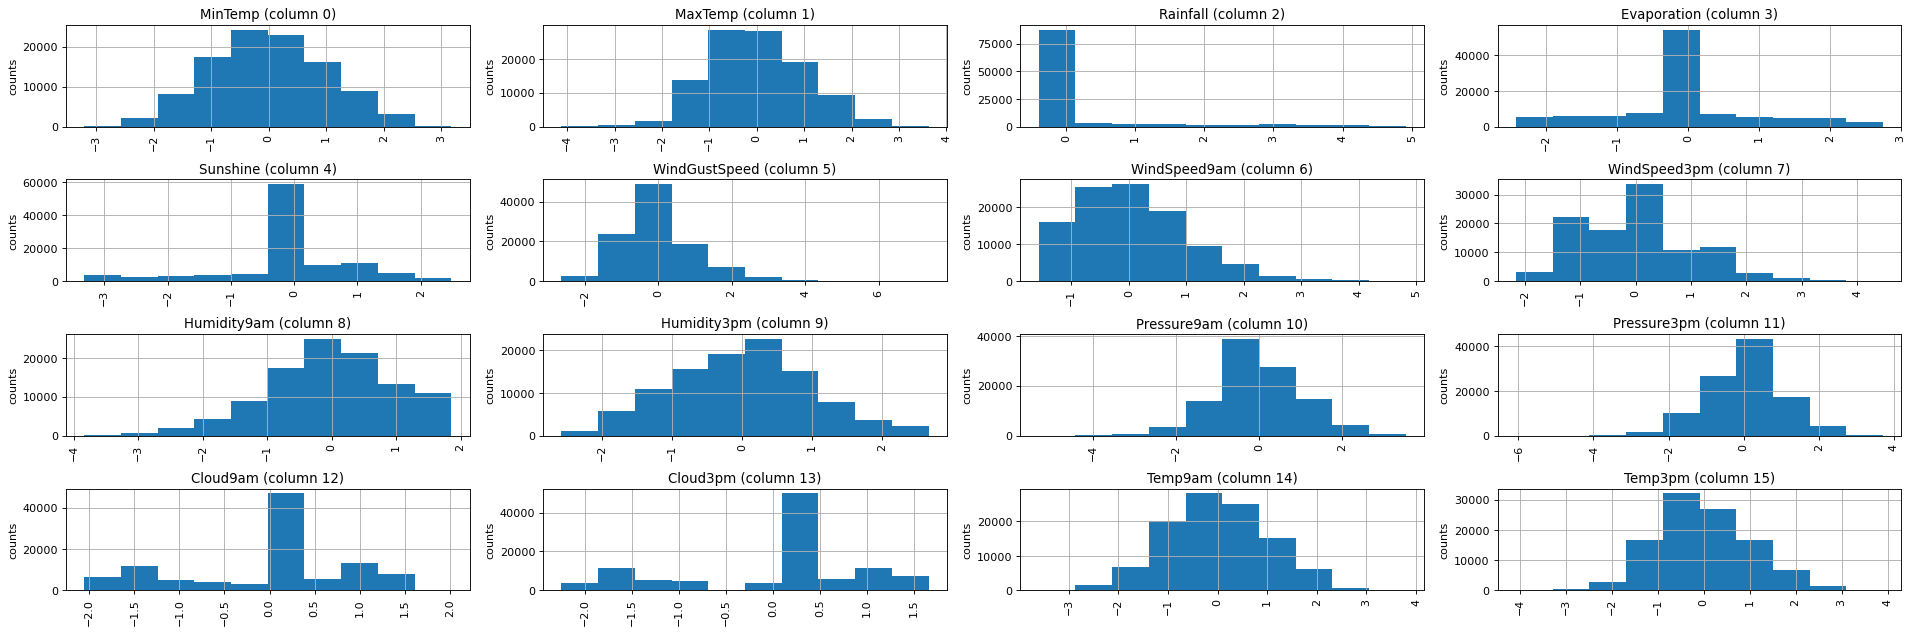

In [34]:
# data distributions
def plotDistribution(df, nGraphPerCol, nGraphPerRow):
    columnNames = list(df)
    nGraphRow = nGraphPerCol / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(df.shape[1]):
        plt.subplot(nGraphPerCol, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
weather_data = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                        'Temp9am', 'Temp3pm']]

plotDistribution(weather_data, 4,4)


# Model Building

In [6]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import time

In [4]:

result = PCA().fit(weather.drop("RainTomorrow", axis = 1))


In [47]:
# small subsample
test_x = x_tr.sample(n = int(0.25*len(y_tr)), random_state = 1)
test_y = y_tr.sample(n = int(0.25*len(y_tr)), random_state = 1)

### SVM

In [142]:
# fit the SVM model
start = time.time()
mysvm = svm.SVC(C = 1, kernel='linear', probability = True)
svm_model = mysvm.fit(test_x, test_y)
print("running time of SVM:", time.time() - start)

running time of SVM: 378.0833308696747


Accuracy of the SVM on train: 0.8695626946212018
Accuracy of the SVM on test: 0.8645919965959422


,Pred 0,Pred 1
Obs 0,42082,828
Obs 1,6173,2620


--------------------------
ROC score of the SVM on train: 0.847119512335229
ROC score of the SVM on test: 0.8440491065606068


<function matplotlib.pyplot.show(close=None, block=None)>

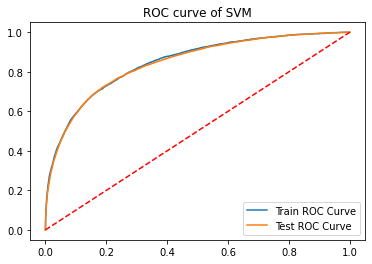

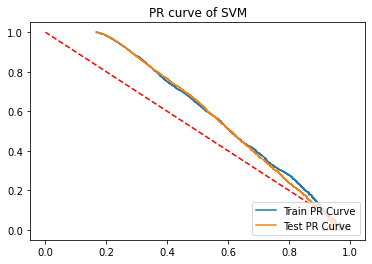

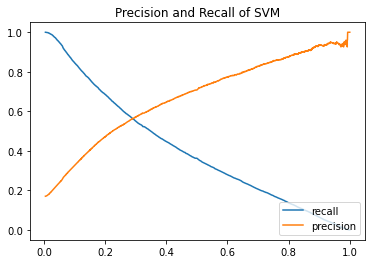

In [143]:
# make prediction based on train
pred_svm_tr = svm_model.predict(x_tr)
prob_svm_tr = svm_model.predict_proba(x_tr)[:,1]
# make prediction based on test
pred_svm_te = svm_model.predict(x_te)
prob_svm_te = svm_model.predict_proba(x_te)[:,1]

# get the prediction accuracy
print("Accuracy of the SVM on train:",(pred_svm_tr == y_tr).mean())
print("Accuracy of the SVM on test:",(pred_svm_te == y_te).mean())
# get the confusion matrix on test
display(pd.DataFrame(confusion_matrix(y_te, pred_svm_te), 
                     columns = ["Pred 0", "Pred 1"],
                     index = ["Obs 0", "Obs 1"]))

print("--------------------------")
# get the ROC score
print("ROC score of the SVM on train:",roc_auc_score(y_tr, prob_svm_tr))
print("ROC score of the SVM on test:",roc_auc_score(y_te, prob_svm_te))
# plot the ROC & PR curve
fpr_tr, tpr_tr, _ = roc_curve(y_tr, prob_svm_tr)
fpr_te, tpr_te, _ = roc_curve(y_te, prob_svm_te)
plt.plot(fpr_tr, tpr_tr, label = "Train ROC Curve")
plt.plot(fpr_te, tpr_te, label = "Test ROC Curve")
plt.plot([0,1],[0,1], "r--")
plt.title("ROC curve of SVM")
plt.legend(loc = "lower right")
plt.show

plt.figure()
precision_tr, recall_tr, thresh_tr = precision_recall_curve(y_tr, prob_svm_tr)
precision_te, recall_te, thresh_te = precision_recall_curve(y_te, prob_svm_te)
plt.plot(precision_tr, recall_tr, label = "Train PR Curve")
plt.plot(precision_te, recall_te, label = "Test PR Curve")
plt.plot([1,0],[0,1], "r--")
plt.title("PR curve of SVM")
plt.legend(loc = "lower right")
plt.show

plt.figure()
plt.plot(thresh_te, recall_te[:-1], label = "recall")
plt.plot(thresh_te, precision_tr[:-1], label = "precision")
plt.title("Precision and Recall of SVM")
plt.legend(loc = "lower right")
plt.show

### Decision Tree

In [175]:
# fit a Decision Tree model
start = time.time()
mydt = DecisionTreeClassifier(max_depth = 5, random_state = 10)
dt_model = mydt.fit(x_tr, y_tr)
print("running time of Decision Tree:", time.time() - start)

running time of Decision Tree: 0.2962322235107422


Accuracy of the DT on train: 0.8648240914453706
Accuracy of the DT on test: 0.8574163975011121


,Pred 0,Pred 1
Obs 0,41969,941
Obs 1,6431,2362


--------------------------
ROC score of the DT on train: 0.8096733443490425
ROC score of the DT on test: 0.798424778740891


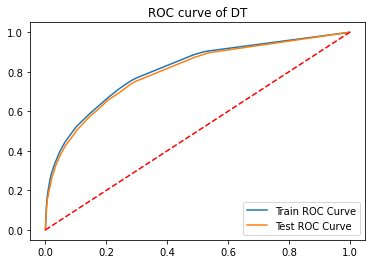

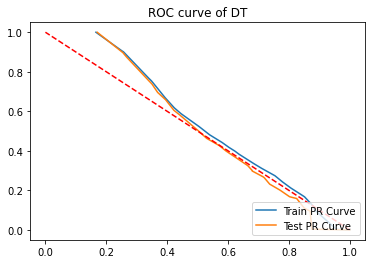

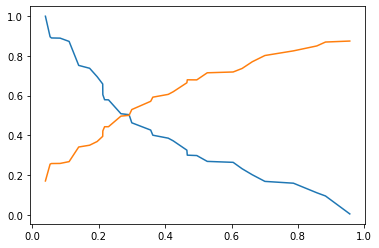

In [176]:
# make prediction based on train
pred_dt_tr = dt_model.predict(x_tr)
prob_dt_tr = dt_model.predict_proba(x_tr)[:,1]
# make prediction based on test
pred_dt_te = dt_model.predict(x_te)
prob_dt_te = dt_model.predict_proba(x_te)[:,1]

# get the prediction accuracy
print("Accuracy of the DT on train:",(pred_dt_tr == y_tr).mean())
print("Accuracy of the DT on test:",(pred_dt_te == y_te).mean())
# get the confusion matrix on test
display(pd.DataFrame(confusion_matrix(y_te, pred_dt_te), 
                     columns = ["Pred 0", "Pred 1"],
                     index = ["Obs 0", "Obs 1"]))

print("--------------------------")
# get the ROC score
print("ROC score of the DT on train:",roc_auc_score(y_tr, prob_dt_tr))
print("ROC score of the DT on test:",roc_auc_score(y_te, prob_dt_te))
# plot the ROC & PR curve
fpr_tr, tpr_tr, _ = roc_curve(y_tr, prob_dt_tr)
fpr_te, tpr_te, _ = roc_curve(y_te, prob_dt_te)
plt.plot(fpr_tr, tpr_tr, label = "Train ROC Curve")
plt.plot(fpr_te, tpr_te, label = "Test ROC Curve")
plt.plot([0,1],[0,1], "r--")
plt.title("ROC curve of DT")
plt.legend(loc = "lower right")
plt.show

plt.figure()
precision_tr, recall_tr, thresh_tr = precision_recall_curve(y_tr, prob_dt_tr)
precision_te, recall_te, thresh_te = precision_recall_curve(y_te, prob_dt_te)
plt.plot(precision_tr, recall_tr, label = "Train PR Curve")
plt.plot(precision_te, recall_te, label = "Test PR Curve")
plt.plot([1,0],[0,1], "r--")
plt.title("ROC curve of DT")
plt.legend(loc = "lower right")
plt.show

plt.figure()
plt.plot(thresh_te, recall_te[:-1], label = "Train PR Curve")
plt.plot(thresh_te, precision_te[:-1], label = "Test PR Curve")

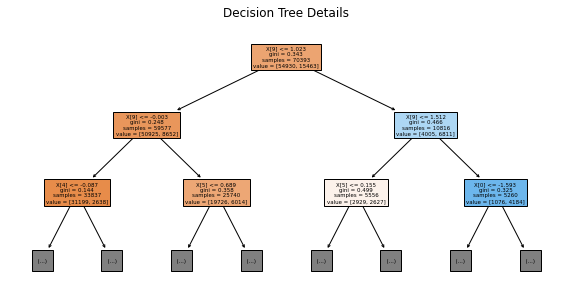

In [76]:
# decision tree plot
plt.figure(figsize = (10,5))
plot_tree(dt_model, max_depth = 2, filled = True)
plt.title("Decision Tree Details")
plt.show()

### Logistic Regression

In [139]:
# fit the logistic regression model
start = time.time()
lm_model = LogisticRegression(max_iter = 1000, random_state = 0).fit(x_tr,y_tr)
print("running time of Logistic Regression:", time.time() - start)

running time of Logistic Regression: 1.9114809036254883


Accuracy of the Logistic on train: 0.8713227472293678
Accuracy of the Logistic on test: 0.8655590584685608


,Pred 0,Pred 1
Obs 0,41533,1377
Obs 1,5574,3219


--------------------------
ROC score of the Logistic on train: 0.8541637569650706
ROC score of the Logistic on test: 0.8510468261667543


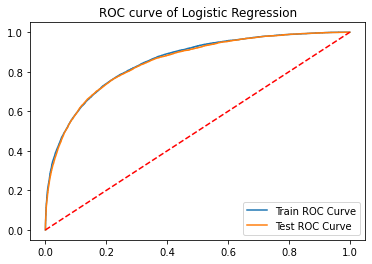

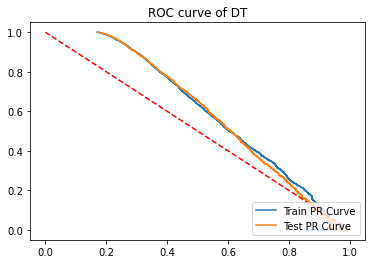

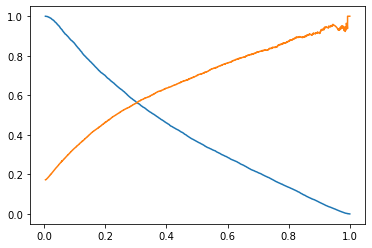

In [140]:
# make prediction based on train
pred_lm_tr = lm_model.predict(x_tr)
prob_lm_tr = lm_model.predict_proba(x_tr)[:,1]
# make prediction based on test
pred_lm_te = lm_model.predict(x_te)
prob_lm_te = lm_model.predict_proba(x_te)[:,1]

# get the prediction accuracy
print("Accuracy of the Logistic on train:",(pred_lm_tr == y_tr).mean())
print("Accuracy of the Logistic on test:",(pred_lm_te == y_te).mean())
# get the confusion matrix on test
display(pd.DataFrame(confusion_matrix(y_te, pred_lm_te), 
                     columns = ["Pred 0", "Pred 1"],
                     index = ["Obs 0", "Obs 1"]))

print("--------------------------")
# get the ROC score
print("ROC score of the Logistic on train:",roc_auc_score(y_tr, prob_lm_tr))
print("ROC score of the Logistic on test:",roc_auc_score(y_te, prob_lm_te))
# plot the ROC & PR curve
fpr_tr, tpr_tr, _ = roc_curve(y_tr, prob_lm_tr)
fpr_te, tpr_te, _ = roc_curve(y_te, prob_lm_te)
plt.plot(fpr_tr, tpr_tr, label = "Train ROC Curve")
plt.plot(fpr_te, tpr_te, label = "Test ROC Curve")
plt.plot([0,1],[0,1], "r--")
plt.title("ROC curve of Logistic Regression")
plt.legend(loc = "lower right")
plt.show

plt.figure()
precision_tr, recall_tr, thresh_tr = precision_recall_curve(y_tr, prob_lm_tr)
precision_te, recall_te, thresh_te = precision_recall_curve(y_te, prob_lm_te)
plt.plot(precision_tr, recall_tr, label = "Train PR Curve")
plt.plot(precision_te, recall_te, label = "Test PR Curve")
plt.plot([1,0],[0,1], "r--")
plt.title("ROC curve of DT")
plt.legend(loc = "lower right")
plt.show

plt.figure()
plt.plot(thresh_te, recall_te[:-1], label = "Train PR Curve")
plt.plot(thresh_te, precision_te[:-1], label = "Test PR Curve")

# Model Tuning

### SVM

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# the test cases for SVM
s_grid = {"C": [0.1,1,10,100], "gamma":[1,0.1,0.01,0.001], "kernel":["rbf"]}
# let grid search choose the best model
svm_grid = GridSearchCV(svm.SVC(probability = True), s_grid, scoring = "accuracy", refit = True, verbose = 1, cv = 3)
svm_grid.fit(test_x,test_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 309.1min finished


GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy of the New SVM on train: 0.8794267257219117
Accuracy of the New SVM on test: 0.8699495193702493


,Pred 0,Pred 1
Obs 0,42097,813
Obs 1,5911,2882


--------------------------
ROC score of the New SVM on train: 0.86290149860952
ROC score of the New SVM on test: 0.841589276898535


<function matplotlib.pyplot.show(close=None, block=None)>

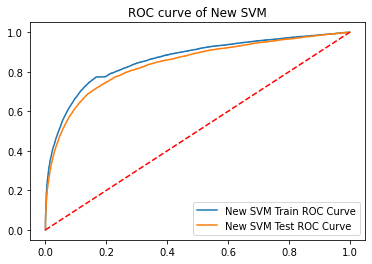

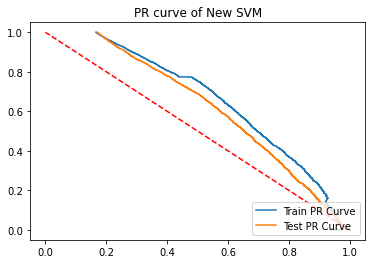

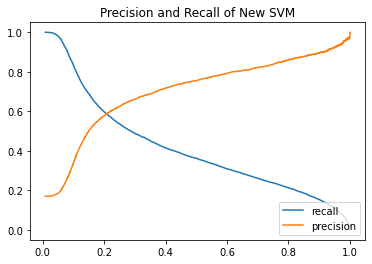

In [10]:
# show the best presets
print(svm_grid.best_params_)
# predict based on the new svm model
pred_svm_grid_tr = svm_grid.predict(x_tr)
prob_svm_grid_tr = svm_grid.predict_proba(x_tr)[:,1]
pred_svm_grid_te = svm_grid.predict(x_te)
prob_svm_grid_te = svm_grid.predict_proba(x_te)[:,1]

# get the prediction accuracy
print("Accuracy of the New SVM on train:",(pred_svm_grid_tr == y_tr).mean())
print("Accuracy of the New SVM on test:",(pred_svm_grid_te == y_te).mean())
# get the confusion matrix on test
display(pd.DataFrame(confusion_matrix(y_te, pred_svm_grid_te), 
                     columns = ["Pred 0", "Pred 1"],
                     index = ["Obs 0", "Obs 1"]))
print("--------------------------")
# get the ROC score
print("ROC score of the New SVM on train:",roc_auc_score(y_tr, prob_svm_grid_tr))
print("ROC score of the New SVM on test:",roc_auc_score(y_te, prob_svm_grid_te))
# plot the ROC curve
fpr_g_tr, tpr_g_tr, _ = roc_curve(y_tr, prob_svm_grid_tr)
fpr_g_te, tpr_g_te, _ = roc_curve(y_te, prob_svm_grid_te)
plt.figure()
plt.plot(fpr_g_tr, tpr_g_tr, label = "New SVM Train ROC Curve")
plt.plot(fpr_g_te, tpr_g_te, label = "New SVM Test ROC Curve")
plt.plot([0,1],[0,1], "r--")
plt.title("ROC curve of New SVM")
plt.legend(loc = "lower right")
plt.show

plt.figure()
precision_g_tr, recall_g_tr, thresh_g_tr = precision_recall_curve(y_tr, prob_svm_grid_tr)
precision_g_te, recall_g_te, thresh_g_te = precision_recall_curve(y_te, prob_svm_grid_te)
plt.plot(precision_g_tr, recall_g_tr, label = "Train PR Curve")
plt.plot(precision_g_te, recall_g_te, label = "Test PR Curve")
plt.plot([1,0],[0,1], "r--")
plt.title("PR curve of New SVM")
plt.legend(loc = "lower right")
plt.show

plt.figure()
plt.plot(thresh_g_te, recall_g_te[:-1], label = "recall")
plt.plot(thresh_g_te, precision_g_te[:-1], label = "precision")
plt.title("Precision and Recall of New SVM")
plt.legend(loc = "lower right")
plt.show

### Decision Tree

In [8]:
d_grid = {"criterion":["gini","entropy"],"max_depth": range(1,30), "max_features":["auto","log2"]}
# let grid search choose the best model
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state = 10), d_grid, scoring = "accuracy", refit = True, verbose = 1, cv = 3)
dt_grid.fit(x_tr,y_tr)

Fitting 3 folds for each of 116 candidates, totalling 348 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 348 out of 348 | elapsed:   34.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_features': ['auto', 'log2']},
             scoring='accuracy', verbose=1)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}
Accuracy of the New DT on train: 0.8427363982747617
Accuracy of the New DT on test: 0.8370113919888594


,Pred 0,Pred 1
Obs 0,42331,579
Obs 1,7848,945


--------------------------
ROC score of the New DT on train: 0.7461948861428461
ROC score of the New DT on test: 0.7288515726543882


<function matplotlib.pyplot.show(close=None, block=None)>

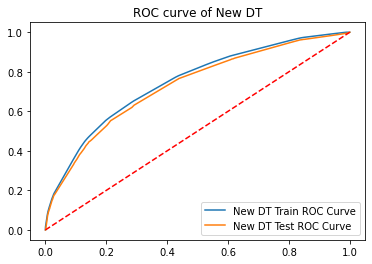

In [9]:
# show the best presets
print(dt_grid.best_params_)
# predict based on the new Decision tree model
pred_dt_grid_tr = dt_grid.predict(x_tr)
prob_dt_grid_tr = dt_grid.predict_proba(x_tr)[:,1]
pred_dt_grid_te = dt_grid.predict(x_te)
prob_dt_grid_te = dt_grid.predict_proba(x_te)[:,1]

# get the prediction accuracy
print("Accuracy of the New DT on train:",(pred_dt_grid_tr == y_tr).mean())
print("Accuracy of the New DT on test:",(pred_dt_grid_te == y_te).mean())

# get the confusion matrix on test
display(pd.DataFrame(confusion_matrix(y_te, pred_dt_grid_te), 
                     columns = ["Pred 0", "Pred 1"],
                     index = ["Obs 0", "Obs 1"]))

print("--------------------------")
# get the ROC score
print("ROC score of the New DT on train:",roc_auc_score(y_tr, prob_dt_grid_tr))
print("ROC score of the New DT on test:",roc_auc_score(y_te, prob_dt_grid_te))
# plot the ROC curve
fpr_g_tr, tpr_g_tr, _ = roc_curve(y_tr, prob_dt_grid_tr)
fpr_g_te, tpr_g_te, _ = roc_curve(y_te, prob_dt_grid_te)
plt.figure()
plt.plot(fpr_g_tr, tpr_g_tr, label = "New DT Train ROC Curve")
plt.plot(fpr_g_te, tpr_g_te, label = "New DT Test ROC Curve")
plt.plot([0,1],[0,1], "r--")
plt.title("ROC curve of New DT")
plt.legend(loc = "lower right")
plt.show



### Logistic Regression

In [10]:
l_grid = {"C": [0.1,1,10], "solver": ["newton-cg","lbfgs","liblinear","sag","saga"]}
lm_grid = GridSearchCV(LogisticRegression(max_iter = 500, random_state = 0), l_grid, scoring = "accuracy", refit = True, verbose = 1, cv = 3)
lm_grid.fit(x_tr,y_tr)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=0),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

{'C': 10, 'solver': 'newton-cg'}
Accuracy of the New LM on train: 0.8713614297042724
Accuracy of the New LM on test: 0.8655590584685608


,Pred 0,Pred 1
Obs 0,41531,1379
Obs 1,5572,3221


--------------------------
ROC score of the New LM on train: 0.8541446910025985
ROC score of the New LM on test: 0.8510233360507446


<function matplotlib.pyplot.show(close=None, block=None)>

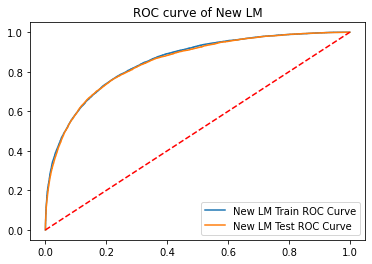

In [11]:
# show the best presets
print(lm_grid.best_params_)
# predict based on the new Decision tree model
pred_lm_grid_tr = lm_grid.predict(x_tr)
prob_lm_grid_tr = lm_grid.predict_proba(x_tr)[:,1]
pred_lm_grid_te = lm_grid.predict(x_te)
prob_lm_grid_te = lm_grid.predict_proba(x_te)[:,1]

# get the prediction accuracy
print("Accuracy of the New LM on train:",(pred_lm_grid_tr == y_tr).mean())
print("Accuracy of the New LM on test:",(pred_lm_grid_te == y_te).mean())

# get the confusion matrix on test
display(pd.DataFrame(confusion_matrix(y_te, pred_lm_grid_te), 
                     columns = ["Pred 0", "Pred 1"],
                     index = ["Obs 0", "Obs 1"]))

print("--------------------------")
# get the ROC score
print("ROC score of the New LM on train:",roc_auc_score(y_tr, prob_lm_grid_tr))
print("ROC score of the New LM on test:",roc_auc_score(y_te, prob_lm_grid_te))
# plot the ROC & PR curve
fpr_g_tr, tpr_g_tr, _ = roc_curve(y_tr, prob_lm_grid_tr)
fpr_g_te, tpr_g_te, _ = roc_curve(y_te, prob_lm_grid_te)
plt.figure()
plt.plot(fpr_g_tr, tpr_g_tr, label = "New LM Train ROC Curve")
plt.plot(fpr_g_te, tpr_g_te, label = "New LM Test ROC Curve")
plt.plot([0,1],[0,1], "r--")
plt.title("ROC curve of New LM")
plt.legend(loc = "lower right")
plt.show

# Analysis

In [43]:
acc_te_svm = np.zeros(10)
time_svm = np.zeros(10)
for i in range(10):
    start = time.time()
    multi_svm = svm.SVC(C = 10, gamma = 0.01, kernel = "rbf", random_state = i).fit(test_x, test_y)
    end = time.time()
    temp_pred = multi_svm.predict(x_te)
    acc = (temp_pred == y_te).mean()
    acc_te_svm[i] = acc
    time_svm[i] = end - start

In [13]:
acc_te_dt = np.zeros(10)
time_dt = np.zeros(10)
for i in range(10):
    start = time.time()
    multi_dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 8, max_features = "log2", random_state = i).fit(test_x, test_y)
    end = time.time()
    temp_pred = multi_dt.predict(x_te)
    acc = (temp_pred == y_te).mean()
    acc_te_dt[i] = acc
    time_dt[i] = end - start

In [14]:
acc_te_lm = np.zeros(10)
time_lm = np.zeros(10)
for i in range(10):
    start = time.time()
    multi_lm = LogisticRegression(C = 10, solver = "newton-cg", max_iter = 500, random_state = i).fit(test_x, test_y)
    end = time.time()
    temp_pred = multi_lm.predict(x_te)
    acc = (temp_pred == y_te).mean()
    acc_te_lm[i] = acc
    time_lm[i] = end - start

In [30]:
time_svm

array([0.86178752, 0.86178752, 0.86178752, 0.86178752, 0.86178752,
       0.86178752, 0.86178752, 0.86178752, 0.86178752, 0.86178752])

Text(0.5, 1.0, 'Time Spent')

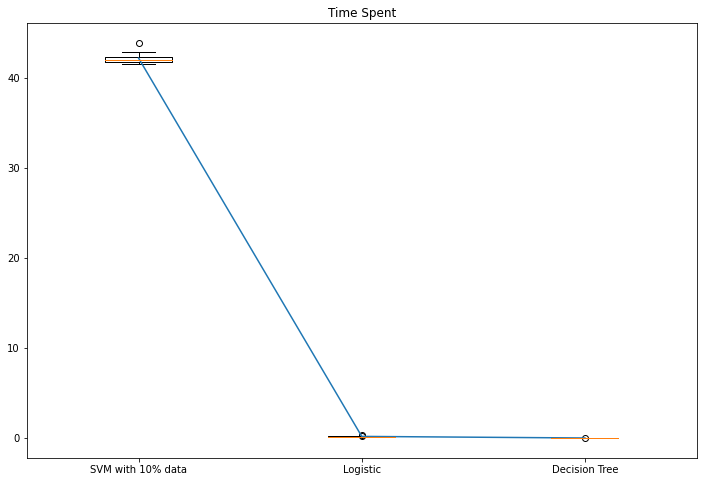

In [44]:
acc_result = {"SVM with 10% data":time_svm, "Logistic": time_lm, "Decision Tree":time_dt}
plt.figure(figsize = (12,8))
plt.boxplot(acc_result.values())
plt.plot((1,2,3),(time_svm.mean(), time_lm.mean(), time_dt.mean()))
plt.xticks([1,2,3],["SVM with 10% data", "Logistic", "Decision Tree"])
plt.title("Time Spent")

In [48]:
mysvm_1 = svm.SVC(C = 1, kernel='linear', probability = True)
svm_model_1 = mysvm_1.fit(test_x, test_y)
pred_svm_te_1 = svm_model_1.predict(x_te)
(pred_svm_te_1 == y_te).mean()

0.8639150532851092

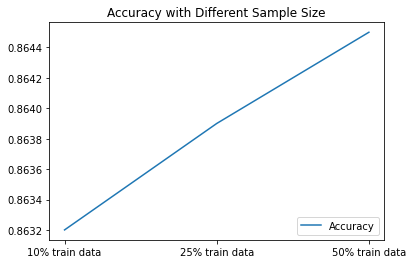

In [51]:
time = np.array([0.8632, 0.8639, 0.8645])
plt.plot(time, label = "Accuracy")
plt.title("Accuracy with Different Sample Size")
plt.xticks([0,1,2],["10% train data", "25% train data", "50% train data"])
plt.legend(loc = "lower right")

In [24]:
locs

array([1, 2, 3])